In [2]:
#!pip install NumPy
# !pip install pandas
# !pip install --user tensorflow
# !pip install --user matplotlib
# !pip install seaborn
# !pip install --user numpy
# !pip install missingno 
# !pip install nnv
# !pip install prince
# !pip uninstall bioinfokit
# !conda install -c bioconda bioinfokit
# !pip install dataframe_image               ####https://pypi.org/project/dataframe-image/
# !pip install jpype1
# !python -m pip install pysimplegui     GUI with Python
# !pip install ggplot
# !pip install feature_selector
# !pip install geopandas
#%pip install dataframe

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from matplotlib.patches import PathPatch
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram
import missingno as msno
import matplotlib.patches as mpatches

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
from time import time
import sqlite3       
from scipy.linalg import svd   
from scipy import stats
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
#from ggplot import *

from pandas import Timestamp

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
 #    'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.decomposition import PCA

df15EIS=pd.read_csv('15EIS.csv')
df001=pd.read_csv('dd0001.csv')
df002=pd.read_csv('dd0002.csv')
df003=pd.read_csv('dd0003B.csv')
df004=pd.read_csv('dd0004.csv')

In [4]:
# Dropping Highly Correlated features
# Create correlation matrix
import numpy as np
corr_matrix = df15EIS.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#print(to_drop)

# Drop features
df15EIS.drop(df15EIS[to_drop], axis=1)

,Hole,Row_index,Ag_ppm,Al_ppm,Alpha,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,Alt2_Int,...,pXRF_Au_ppm,pXRF_Ba_ppm,pXRF_Cd_ppm,pXRF_Cs_ppm,pXRF_Hg_ppm,pXRF_Pt_ppm,pXRF_S_ppm,pXRF_Sc_ppm,pXRF_Te_ppm,pXRF_Th_ppm
0,15EIS,1,NaN,NaN,NaN,ch,s,pr,bi,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15EIS,2,NaN,NaN,NaN,ch,s,pr,bi,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15EIS,3,NaN,NaN,NaN,ch,s,pr,bi,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15EIS,4,NaN,NaN,NaN,ch,s,pr,bi,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15EIS,5,NaN,NaN,NaN,ch,s,pr,bi,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,15EIS,2405,NaN,NaN,NaN,sl,s,pr,Xobs,Xobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2405,15EIS,2406,NaN,NaN,NaN,sl,s,pr,Xobs,Xobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2406,15EIS,2407,NaN,NaN,NaN,sl,s,pr,Xobs,Xobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2407,15EIS,2408,NaN,NaN,NaN,sl,s,pr,Xobs,Xobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column', None)
df15EIS.describe(include='all').T

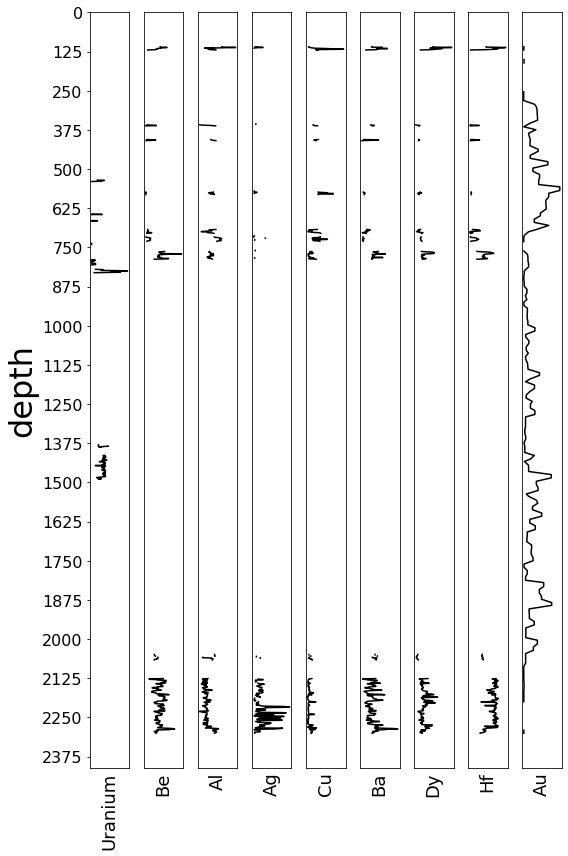

In [7]:
fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(191)
ax1.plot(df15EIS['U_ppm'].values, df15EIS['Depth_m'].values, 'k')
ax1.invert_yaxis()
ax1.set_ylabel('depth',fontsize=32)
ax1.grid(which='minor', alpha=0)
ax1.grid(which='major', alpha=0)
ax1.set_ylim(2410, 0)
ax1.set_yticks(np.arange(0, 2450, 125))
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xticks([])
ax1.set_xlabel('Uranium',rotation=90,fontsize=18)

def depth_ana(plot,ax,x,y,title):
    ax = fig.add_subplot(plot)
    ax.plot(df15EIS[x].values, df15EIS[y].values, 'k')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlabel(title,rotation=90, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    
depth_ana(192,ax1,'Be_ppm','Depth_m','Be')
depth_ana(193,ax1,'Al_ppm','Depth_m','Al')
depth_ana(194,ax1,'Ag_ppm','Depth_m','Ag')
depth_ana(195,ax1,'Cu_ppm','Depth_m','Cu')
depth_ana(196,ax1,'Ba_ppm','Depth_m','Ba')
depth_ana(197,ax1,'Dy_ppm','Depth_m','Dy')
depth_ana(198,ax1,'Hf_ppm','Depth_m','Hf')
depth_ana(199,ax1,'Au_ppm','Depth_m','Au')
plt.tight_layout()
plt.show()

In [8]:
data_nan = df15EIS.copy()

In [9]:
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)

In [13]:
df1_15EIS=df15EIS[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]
df1_001=df001[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_002=df002[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_003=df003[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_004=df004[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

In [14]:
df1_15EIS.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_001.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_002.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_003.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_004.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

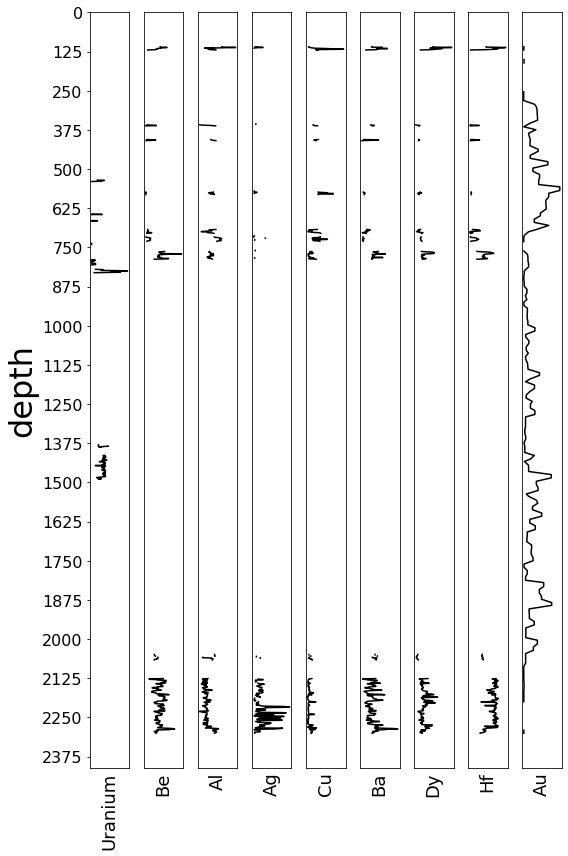

In [15]:
fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(191)
ax1.plot(df15EIS['U_ppm'].values, df15EIS['Depth_m'].values, 'k')
ax1.invert_yaxis()
ax1.set_ylabel('depth',fontsize=32)
ax1.grid(which='minor', alpha=0)
ax1.grid(which='major', alpha=0)
ax1.set_ylim(2410, 0)
ax1.set_yticks(np.arange(0, 2450, 125))
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xticks([])
ax1.set_xlabel('Uranium',rotation=90,fontsize=18)

def depth_ana(plot,ax,x,y,title):
    ax = fig.add_subplot(plot)
    ax.plot(df15EIS[x].values, df15EIS[y].values, 'k')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlabel(title,rotation=90, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    
depth_ana(192,ax1,'Be_ppm','Depth_m','Be')
depth_ana(193,ax1,'Al_ppm','Depth_m','Al')
depth_ana(194,ax1,'Ag_ppm','Depth_m','Ag')
depth_ana(195,ax1,'Cu_ppm','Depth_m','Cu')
depth_ana(196,ax1,'Ba_ppm','Depth_m','Ba')
depth_ana(197,ax1,'Dy_ppm','Depth_m','Dy')
depth_ana(198,ax1,'Hf_ppm','Depth_m','Hf')
depth_ana(199,ax1,'Au_ppm','Depth_m','Au')
plt.tight_layout()
plt.show()